# Music Note Classification

## Project Overview

---
### **Introduction**

For our Spring 2021 semester ITEC 4700 Artificial Intelligence project, the team was tasked with selecting a topic of interest that could apply Machine Learning to generate a solution. After much deliberation, we decided to base our project on a project conducted by four students at Stanford University called **Music Genre Classification.** 

*   [Report](http://cs229.stanford.edu/proj2016/report/BurlinCremeLenain-MusicGenreClassification-report.pdf)
*   [Poster](http://cs229.stanford.edu/proj2016/poster/BurlinCremeLenain-MusicGenreClassification-poster.pdf)
---
### **The Team**

Sarah Price<br>
Ruth Whitehouse<br>
Shababa Kamreen<br>
Lillian Sheppard<br>

---
### **Project Goal**

Our original plan was to follow the concept of classifying .mp3 files into four different categories of music (i.e. Country, Classical, Metal, and Pop) similar to that of our peers at Standford University. However, we quickly realized that we had very little understanding of MFCC coefficients and how they pertained to the algorithms we were utilizing in class. Our team spent a few weeks trying to understand how to incorporate the concept into our relative plan, but due to time constraints we started to discuss alternative approaches to classifying music, or a form of it. Thus, we came up with the idea of using what we knew about image classification to classify the different musical notes that can be found on sheet music. 

---
## **Dataset**
Our classification is based off of [this](https://www.kaggle.com/kishanj/music-notes-datasets) dataset from **Kaggle**.

---

### **Original Project Proposal**
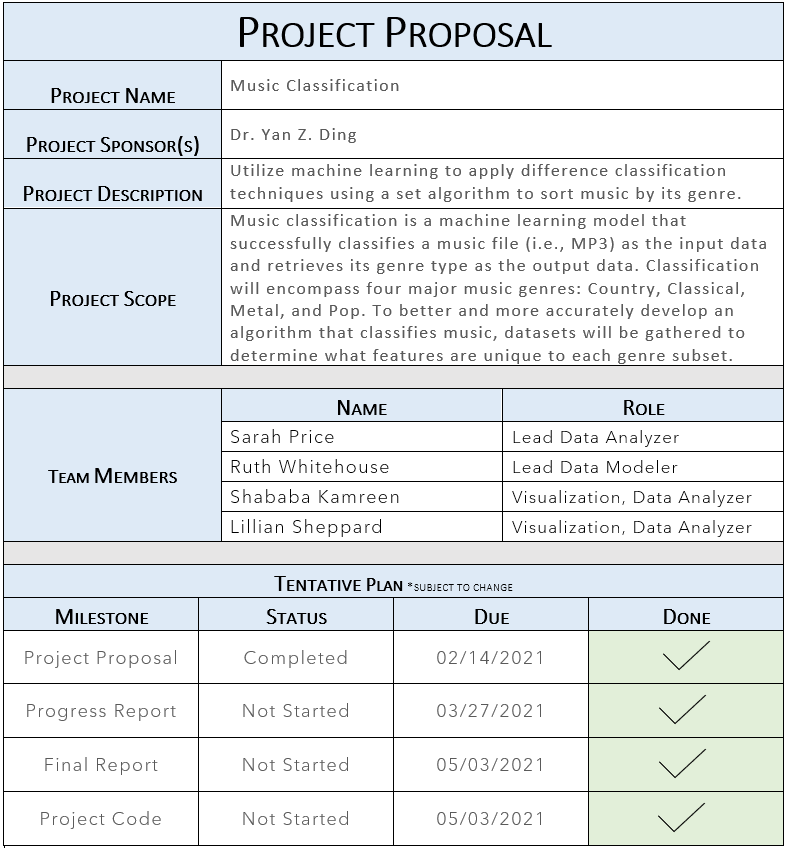

## Importing the Data


---
First and foremost, we must import all of the necessary libraries that will be required to complete our exploratory classification of musical notes. 

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image

%matplotlib inline

---
We decided that the most convienent way to load and access the data for all parties involved would be to extract the `.csv` file from GitHub (the link is provided under **Quick Links**.) We have displayed the first few rows to ensure none of the rows contain `NaN`, or any other formatting issues. 

In [ ]:
url = 'https://raw.githubusercontent.com/staranger01/ai/main/dataset.csv'

notes = pd.read_csv(url)

notes.head()

,label,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,...,pixel 745,pixel 746,pixel 747,pixel 748,pixel 749,pixel 750,pixel 751,pixel 752,pixel 753,pixel 754,pixel 755,pixel 756,pixel 757,pixel 758,pixel 759,pixel 760,pixel 761,pixel 762,pixel 763,pixel 764,pixel 765,pixel 766,pixel 767,pixel 768,pixel 769,pixel 770,pixel 771,pixel 772,pixel 773,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
0,Whole,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,253,253,253,253,253,253,253,253,253,253,253,...,254,254,254,254,254,254,254,254,254,254,254,254,253,253,253,253,253,253,253,253,253,253,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
1,Whole,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
2,Whole,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255
3,Whole,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253
4,Whole,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252


---
Let's make a few more basic observations about our dataset before moving on to classification. 

In [ ]:
# Shows the total number of rows and columns in the dataset. 
notes.shape

(5000, 785)

In [ ]:
# Shows the column titles. This will be especially helpful when we prepare the data.
notes.columns

Index(['label', 'pixel 1', 'pixel 2', 'pixel 3', 'pixel 4', 'pixel 5',
       'pixel 6', 'pixel 7', 'pixel 8', 'pixel 9',
       ...
       'pixel 775', 'pixel 776', 'pixel 777', 'pixel 778', 'pixel 779',
       'pixel 780', 'pixel 781', 'pixel 782', 'pixel 783', 'pixel 784'],
      dtype='object', length=785)

In [ ]:
# Shows the column datatypes. 
notes.dtypes

label        object
pixel 1       int64
pixel 2       int64
pixel 3       int64
pixel 4       int64
              ...  
pixel 780     int64
pixel 781     int64
pixel 782     int64
pixel 783     int64
pixel 784     int64
Length: 785, dtype: object

In [ ]:
# While we do not believe that this imformation will contribute to the 
# classification, we wanted to include it in case there is a problem with 
# our indexes during visualization. 

notes.describe()

,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,pixel 40,...,pixel 745,pixel 746,pixel 747,pixel 748,pixel 749,pixel 750,pixel 751,pixel 752,pixel 753,pixel 754,pixel 755,pixel 756,pixel 757,pixel 758,pixel 759,pixel 760,pixel 761,pixel 762,pixel 763,pixel 764,pixel 765,pixel 766,pixel 767,pixel 768,pixel 769,pixel 770,pixel 771,pixel 772,pixel 773,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,pixel 784
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,254.151000,254.154000,254.15800,254.162800,254.172600,254.181000,254.157000,254.104200,254.049800,253.953600,253.790000,253.383800,253.122800,253.060000,252.680000,253.224800,253.502200,253.815200,254.043000,254.121000,254.125400,254.15520,254.192800,254.213000,254.216200,254.219000,254.219800,254.221000,254.150800,254.153200,254.157000,254.161800,254.170600,254.153600,254.096400,254.015600,253.857600,253.5912,253.282000,252.621400,...,252.413600,253.407800,253.945600,254.1448,254.221200,254.223600,254.223200,254.223000,254.223400,254.225000,254.225400,254.226000,254.211000,254.186600,254.168000,254.140400,254.073600,253.960000,253.805200,253.611200,253.297200,252.745800,252.058800,251.273200,250.658800,250.69700,251.256800,252.295400,253.286000,253.863000,254.136200,254.214600,254.222400,254.224400,254.223800,254.223800,254.223600,254.224400,254.224800,254.226400
std,0.961449,0.959202,0.95248,0.941527,0.918574,0.905761,1.692018,4.017234,4.655411,6.552132,8.341236,11.412999,11.879728,12.096746,15.463629,11.245513,9.197245,7.294278,4.641924,3.069241,3.329308,3.71751,1.653292,0.850044,0.847586,0.847811,0.846186,0.844927,0.972753,0.968048,0.962152,0.952787,0.946824,1.889741,4.255858,5.723907,7.335481,9.9925,12.189512,15.906586,...,18.240402,12.148951,6.923108,3.0062,0.854878,0.846963,0.855762,0.849126,0.845952,0.842684,0.842577,0.843247,0.917522,2.288499,3.442404,3.893805,5.301566,6.982876,9.369974,11.087769,13.146446,16.360743,19.901682,23.244669,25.576325,25.84996,23.945545,19.107777,13.449847,7.537347,3.421986,0.931622,0.842069,0.843438,0.853147,0.848444,0.854019,0.852402,0.850417,0.840288
min,247.000000,247.000000,246.00000,247.000000,247.000000,247.000000,174.000000,31.000000,40.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,14.000000,118.000000,104.000000,0.00000,154.000000,251.000000,251.000000,251.000000,251.000000,252.000000,247.000000,247.000000,247.000000,247.000000,241.000000,143.000000,36.000000,0.000000,0.000000,0.0000,0.000000,0.000000,...,0.000000,0.000000,2.000000,134.0000,247.000000,247.000000,243.000000,246.000000,249.000000,250.000000,250.000000,249.000000,231.000000,104.000000,19.000000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

---
Next, we need to import the folders that contain our distinguished musical notes. The same method of extracting them from GitHub was used for cohesiveness. 

In [ ]:
!git clone https://github.com/staranger01/ai.git

fatal: destination path 'ai' already exists and is not an empty directory.


In [ ]:
! ls

ai  gdrive  sample_data


In [ ]:
%cd ai

/content/ai


In [ ]:
%cd datasets/

/content/ai/datasets


In [ ]:
%cd datasets/

/content/ai/datasets/datasets


In [ ]:
%cd Notes/

/content/ai/datasets/datasets/Notes


## Pre-Processing the Data

**This dataset does not require any pre-processing. It is ready for classification and/or further analysis as it is.**

## Preparing the Data

---
Our first step in preparing the data is opening and loading each image from our file into our code. Relative to this case, we have formatted each image to open with a letter that determines the nature of the note, followed by the extension `.jpg` and a subsequent number. For example, the first whole note will begin with a `w` followed by `.jpg` and `1`. This is called *List Comprehension*. 

Below we have labeled our musical notes in ascending order of beat, as well as display one image of its kind using `Image.open` from the image module we previously imported from `PIL`.

Next, you will see that we've created an numpy array for each musical note type so that it is easier to merge the sets (i.e., Training, Validation, and Testing). 

---
**Labeling the Sixteenth Notes**

In [ ]:
dir = 'Sixteenth'
m = 1001
sixteenth_f_names = ['s' +  str(i) + '.jpg' for i in range(1, m)]
# sixteenth_f_names

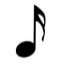

In [ ]:
im1 = Image.open(os.path.join(dir, 's1.jpg'))
im1

In [ ]:
type(im1)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
sixteenth_x= []
count = 0
for f_name in sixteenth_f_names:
    path = os.path.join(dir, f_name)
    im = Image.open(path)
    sixteenth_x.append(im)
    im = im.resize((150,150))
    im = np.array(im).reshape(-1) / 255
    sixteenth_x[count] = im
    count += 1

---
**Labeling the Eighth Notes**

In [ ]:
dir = 'Eight'
m = 1001
eight_f_names = ['e' +  str(i) + '.jpg' for i in range(1, m)]
# eight_f_names

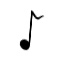

In [ ]:
im2 = Image.open(os.path.join(dir, 'e1.jpg'))
im2

In [ ]:
type(im2)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
eighth_x= []
count = 0
for f_name in eight_f_names:
    path = os.path.join(dir, f_name)
    im = Image.open(path)
    eighth_x.append(im)
    im = im.resize((150,150))
    im = np.array(im).reshape(-1) / 255
    eighth_x[count] = im
    count += 1

---
**Labeling the Quarter Notes**

In [ ]:
dir = 'Quarter'
m = 1001
quarter_f_names = ['q' +  str(i) + '.jpg' for i in range(1, m)]
# quarter_f_names

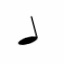

In [ ]:
im3 = Image.open(os.path.join(dir, 'q1.jpg'))
im3

In [ ]:
type(im3)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
quarter_x= []
count = 0
for f_name in quarter_f_names:
    path = os.path.join(dir, f_name)
    im = Image.open(path)
    quarter_x.append(im)
    im = im.resize((150,150))
    im = np.array(im).reshape(-1) / 255
    quarter_x[count] = im
    count += 1

---
**Labeling the Half Notes**

In [ ]:
dir = 'Half'
m = 1001
half_f_names = ['h' +  str(i) + '.jpg' for i in range(1, m)]
# half_f_names

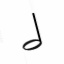

In [ ]:
im4 = Image.open(os.path.join(dir, 'h1.jpg'))
im4

In [ ]:
type(im4)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
half_x= []
count = 0
for f_name in half_f_names:
    path = os.path.join(dir, f_name)
    im = Image.open(path)
    half_x.append(im)
    im = im.resize((150,150))
    im = np.array(im).reshape(-1) / 255
    half_x[count] = im
    count += 1

---
**Labeling the Whole Notes**

In [ ]:
dir = 'Whole'
m = 1001
whole_f_names = ['w' +  str(i) + '.jpg' for i in range(1, m)]
# whole_f_names

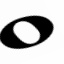

In [ ]:
im5 = Image.open(os.path.join(dir, 'w1.jpg'))
im5

In [ ]:
type(im5)

PIL.JpegImagePlugin.JpegImageFile

---
Below, we have included a cell that creates an array for all of our x-values which represent our images. Our y-values represent each label which will never change.

In [ ]:
whole_x= []
count = 0
for f_name in whole_f_names:
    path = os.path.join(dir, f_name)
    im = Image.open(path)
    whole_x.append(im)
    im = im.resize((150,150))
    im = np.array(im).reshape(-1) / 255
    whole_x[count] = im
    count += 1

## Splitting the Data

---
 In order to begin teaching the machine how to classify the music notes, we have to do some preparation work to the dataset. This includes splitting the data into 3 sets: the training, the validation, and the testing. 

We want to be sure that there are equal opportunities for the machine to learn each type of note, so initially, we split the data into Pandas dataframes for each type of note, creating 5 dataframes. Once split, we divided each of those frames into training, validation, and testing sets for each type of note. 

Finally, we combined each of the 5 training, validation, and testing sets back into one dataframe for each purpose so that it would include notes of each type.

---
**Step One**: Split each type of note into a training set vs a test set, so that we have an equal number of each type of note in the training set.

In [ ]:
from sklearn.model_selection import train_test_split

sixteenth_train_x, sixteenth_test_x = train_test_split(sixteenth_x, test_size=0.2)
eighth_train_x, eighth_test_x = train_test_split(eighth_x, test_size=0.2)
quarter_train_x, quarter_test_x = train_test_split(quarter_x, test_size=0.2)
half_train_x, half_test_x = train_test_split(half_x, test_size=0.2)
whole_train_x, whole_test_x = train_test_split(whole_x, test_size=0.2)

print(len(sixteenth_train_x),len(sixteenth_test_x))
print(len(eighth_train_x),len(eighth_test_x))
print(len(quarter_train_x),len(quarter_test_x))
print(len(half_train_x),len(half_test_x))
print(len(whole_train_x),len(whole_test_x))

800 200
800 200
800 200
800 200
800 200


---
**Step Two**: Separate the validation sets out from each training set.

In [ ]:
sixteenth_val_x = sixteenth_train_x[700:]
eighth_val_x = eighth_train_x[700:]
quarter_val_x = quarter_train_x[700:]
half_val_x = half_train_x[700:]
whole_val_x = whole_train_x[700:]

sixteenth_train_x = sixteenth_train_x[:700]
eighth_train_x = eighth_train_x[:700]
quarter_train_x = quarter_train_x[:700]
half_train_x = half_train_x[:700]
whole_train_x = whole_train_x[:700]

print(len(sixteenth_val_x),len(sixteenth_train_x))
print(len(eighth_val_x),len(eighth_train_x))
print(len(half_val_x),len(half_train_x))
print(len(quarter_val_x),len(quarter_train_x))
print(len(whole_val_x),len(whole_train_x))

100 700
100 700
100 700
100 700
100 700


---
**Step Three**: Create arrays containing the labels for each of the 5 notes' individual datasets.

In [ ]:
sixteenth_train_y = ['sixteenth'] * len(sixteenth_train_x)
eighth_train_y = ['eighth'] * len(eighth_train_x)
quarter_train_y = ['quarter'] * len(quarter_train_x)
half_train_y = ['half'] * len(half_train_x)
whole_train_y = ['whole'] * len(whole_train_x)


In [ ]:
sixteenth_val_y = ['sixteenth'] * len(sixteenth_val_x)
eighth_val_y = ['eighth'] * len(eighth_val_x)
quarter_val_y = ['quarter'] * len(quarter_val_x)
half_val_y = ['half'] * len(half_val_x)
whole_val_y = ['whole'] * len(whole_val_x)


In [ ]:
sixteenth_test_y = ['sixteenth'] * len(sixteenth_test_x)
eighth_test_y = ['eighth'] * len(eighth_test_x)
quarter_test_y = ['quarter'] * len(quarter_test_x)
half_test_y = ['half'] * len(half_test_x)
whole_test_y = ['whole'] * len(whole_test_x)


---
**Step Four**: Combine the training and test sets for each note type into one training and test set for the whole dataset.

In [ ]:
x_train = sixteenth_train_x + eighth_train_x + quarter_train_x + half_train_x + whole_train_x
y_train = sixteenth_train_y + eighth_train_y + quarter_train_y + half_train_y + whole_train_y

x_val = sixteenth_val_x + eighth_val_x + quarter_val_x + half_val_x + whole_val_x
y_val = sixteenth_val_y + eighth_val_y + quarter_val_y + half_val_y + whole_val_y

x_test = sixteenth_test_x + eighth_test_x + quarter_test_x + half_test_x + whole_test_x
y_test = sixteenth_test_y + eighth_test_y + quarter_test_y + half_test_y + whole_test_y

print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

3500 3500
500 500
1000 1000


## Testing the Model

---
### Random Forest<br>
`A comparison between the Random Forest test and K-Nearest-Neighbor test can be found in the Conclusion.`

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_train_pred = random_forest.predict(x_train)

In [ ]:
# Training set accuracy
np.mean(y_train == y_train_pred)

1.0

In [ ]:
# Validation set accuracy
np.mean(y_val == y_val_pred)

1.0

In [ ]:
y_pred = random_forest.predict(x_test)

In [ ]:
# Testing set accuracy
np.mean(y_pred == y_test)

0.977

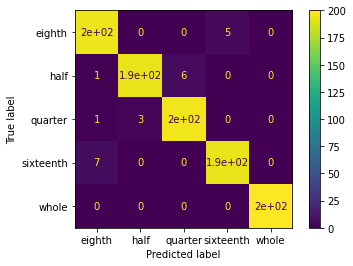

In [ ]:
plot_confusion_matrix(random_forest, x_test, y_test)

In [ ]:
random_forest.fit(x_val, y_val)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_val_pred = random_forest.predict(x_val)

---
### K-Nearest Neighbor<br>
`A comparison between the Random Forest test and K-Nearest-Neighbor test can be found in the Conclusion.` 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [ ]:
# Training set accuracy
y_train_pred = knn.predict(x_train)
np.mean(y_train_pred == y_train)

1.0

In [ ]:
# Validation set accuracy
y_val_pred = knn.predict(x_val)
np.mean(y_val_pred == y_val)

1.0

In [ ]:
# Testing set accuracy
y_test_pred = knn.predict(x_test)
np.mean(y_test_pred == y_test)

0.963

In [ ]:
knn.fit(x_val, y_val)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

## Conclusion

Overall, results are very favorable. Let's start by looking at the outcome of our Random Forest model. The accuracy rate for the Training Set turned out to be 100%. Initially, we were highly suspicious, but decided not to write it off before running the Validation Set. First of all, the purpose of our Validation Set is to ensure that the model doesn't start learning from the Training Set and therefore skew our results. When we ran said test, we also got an accuracy rate of 100%, which is promising. Finally, the accuracy results for our Testing Set was 97.7%. The team determined that this was a great success -- that our model was successfully able to sort the musical notes into their proper categories without having a tremendous amount of misclassified images. 

Next, we will look at the results of the K-Nearest-Neighbor model. The accuracy rates for both Training and Validation sets were 100%. For our Testing set, we got 96.3% accuracy. While not as high as the previous model, one can hardly say the model did poorly. While the model was not improved, it still scored in the high percentile. Overall, our Random Forest model tested better by only 1.4%. 

Due to a time constraint, we were unable to run our sets through other models, however, in the future we would like to revsist this dataset and run our data though a Convolutional Neural Network. 

## Quick Links

---
This is a link to our [Github](https://github.com/staranger01/Music-Classifier) where we store our dataset from Kaggle and all the folders that contain the training, validation, and testing sets for public use. 